In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization

batch_size = 32
num_classes = 10
#epochs = 1600
data_augmentation = True

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

CASE 1 - relu,softmax,rmsprop,50 epochs

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(48, (3, 3),kernel_initializer='random_normal',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(GlobalMaxPooling2D())
model.add(Dense(500))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 activation (Activation)     (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 48)        1

In [ ]:
#opt = keras.optimizers.RMSProp(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer="RMSProp",
              metrics=['accuracy'])

In [ ]:
 m1=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 24s 8ms/step - loss: 1.8971 - accuracy: 0.2799 - val_loss: 1.6755 - val_accuracy: 0.3845
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5246 - accuracy: 0.4402 - val_loss: 1.3768 - val_accuracy: 0.4892
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3610 - accuracy: 0.5069 - val_loss: 1.3869 - val_accuracy: 0.5003
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.2515 - accuracy: 0.5510 - val_loss: 1.1734 - val_accuracy: 0.5804
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1786 - accuracy: 0.5809 - val_loss: 1.2778 - val_accuracy: 0.5517
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1284 - accuracy: 0.5972 - val_loss: 1.1572 - val_accuracy: 0.6005
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0860 - accuracy: 0.6172 - val_loss: 1.1700 - val_ac

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

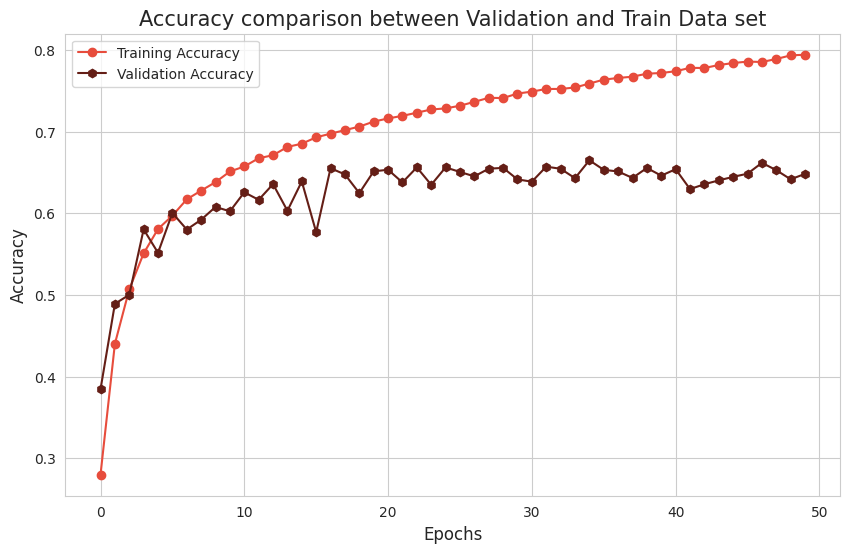

In [58]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(10, 6))
sb.set_style("whitegrid")

# Check if 'accuracy' or 'acc' key is present in the history dictionary
if 'accuracy' in m1.history:
    plt.plot(m1.history['accuracy'], color="#E74C3C", marker='o', label='Training Accuracy')
if 'val_accuracy' in m1.history:
    plt.plot(m1.history['val_accuracy'], color='#641E16', marker='h', label='Validation Accuracy')

plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Add legend only if there are labeled elements in the plot
if 'accuracy' in m1.history or 'val_accuracy' in m1.history:
    plt.legend()

plt.show()


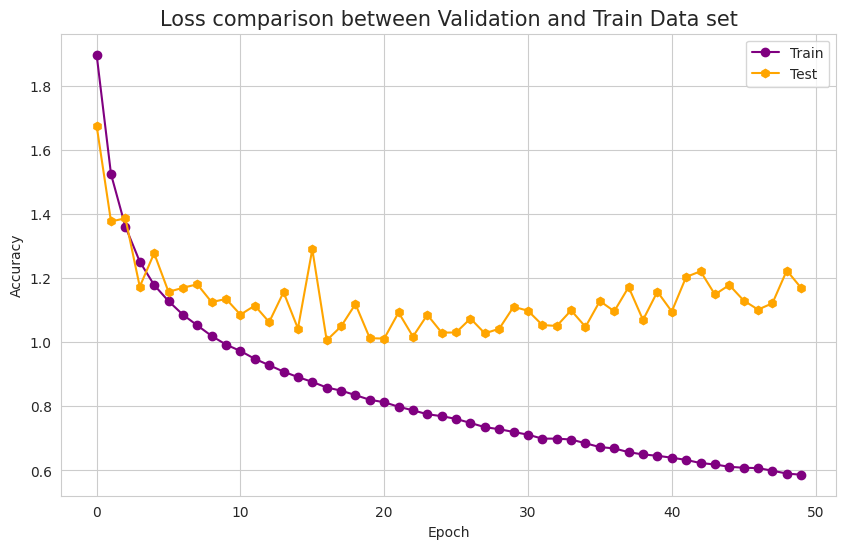

In [57]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m1.history['loss'],color="Purple",marker='o')
plt.plot(m1.history['val_loss'],color='Orange',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

CASE 2 - relu,softmax,adam,epochs-100

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(48, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3),kernel_initializer='random_uniform',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(GlobalMaxPooling2D())
model2.add(Dropout(0.25))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                     

In [ ]:
opt = keras.optimizers.Adamax(lr=0.001)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
 m2=model2.fit(x_train, y_train,
              batch_size=500,
              epochs=100,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/100
100/100 [==============================] - 18s 105ms/step - loss: 2.8561 - accuracy: 0.2096 - val_loss: 2.3155 - val_accuracy: 0.1000
Epoch 2/100
100/100 [==============================] - 10s 99ms/step - loss: 2.1898 - accuracy: 0.2739 - val_loss: 2.3374 - val_accuracy: 0.0999
Epoch 3/100
100/100 [==============================] - 10s 99ms/step - loss: 2.0141 - accuracy: 0.3159 - val_loss: 2.5264 - val_accuracy: 0.1059
Epoch 4/100
100/100 [==============================] - 10s 99ms/step - loss: 1.8768 - accuracy: 0.3550 - val_loss: 2.8498 - val_accuracy: 0.1209
Epoch 5/100
100/100 [==============================] - 10s 99ms/step - loss: 1.7688 - accuracy: 0.3886 - val_loss: 2.3595 - val_accuracy: 0.2080
Epoch 6/100
100/100 [==============================] - 10s 100ms/step - loss: 1.6804 - accuracy: 0.4182 - val_loss: 1.8001 - val_accuracy: 0.3461
Epoch 7/100
100/100 [==============================] - 10s 100ms/step - loss: 1.5894 - accuracy: 0.4484 - val_loss: 1.6304 - val

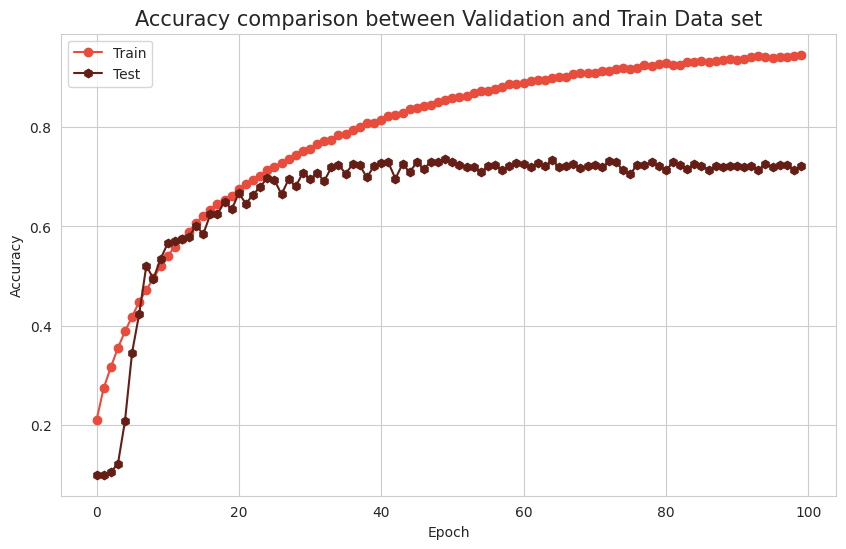

In [56]:
plt.figure(figsize=(10, 6))
sb.set_style("whitegrid")

# Check if 'accuracy' key is present in the history dictionary
if 'accuracy' in m2.history:
    plt.plot(m2.history['accuracy'], color="#E74C3C", marker='o')
if 'val_accuracy' in m2.history:
    plt.plot(m2.history['val_accuracy'], color='#641E16', marker='h')

plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


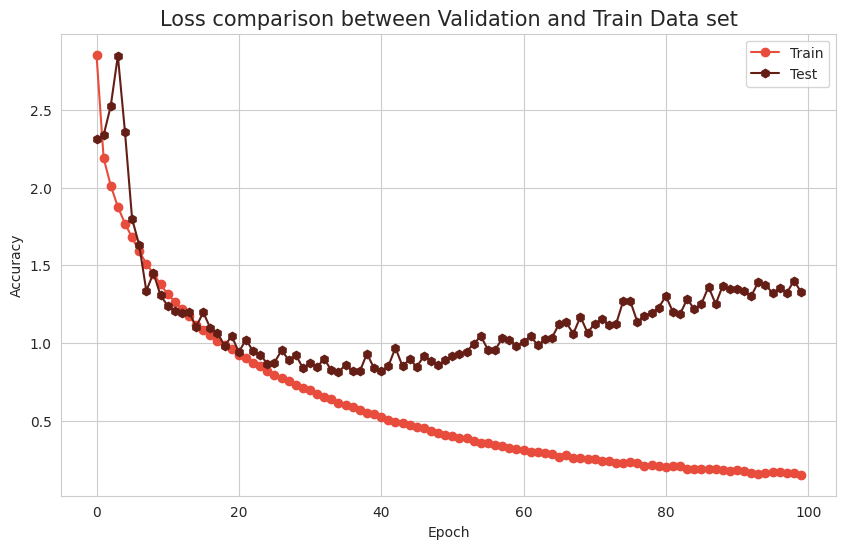

In [55]:
plt.figure(figsize=(10, 6))
sb.set_style("whitegrid")
plt.plot(m2.history['loss'],color="#E74C3C",marker='o')
plt.plot(m2.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

CASE 3-tanh,softmax,epochs-100,adamax

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(32, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(Conv2D(48, (3, 3),kernel_initializer='glorot_uniform',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('tanh'))
model3.add(GlobalMaxPooling2D())
model3.add(Dense(500))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_15 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_16 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 activation_17 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 24, 24, 48)       

In [ ]:
#opt = keras.optimizers.Adam(lr=0.0001)
model3.compile(loss='categorical_crossentropy',
              optimizer="Adamax",
              metrics=['accuracy'])

In [ ]:
 m3=model3.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=150,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/150
1563/1563 [==============================] - 17s 9ms/step - loss: 1.7447 - accuracy: 0.3463 - val_loss: 1.5560 - val_accuracy: 0.4332
Epoch 2/150
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4322 - accuracy: 0.4796 - val_loss: 1.3467 - val_accuracy: 0.5196
Epoch 3/150
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3065 - accuracy: 0.5312 - val_loss: 1.2604 - val_accuracy: 0.5504
Epoch 4/150
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2250 - accuracy: 0.5620 - val_loss: 1.2609 - val_accuracy: 0.5568
Epoch 5/150
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1731 - accuracy: 0.5802 - val_loss: 1.1948 - val_accuracy: 0.5707
Epoch 6/150
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1249 - accuracy: 0.5976 - val_loss: 1.1381 - val_accuracy: 0.5952
Epoch 7/150
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0895 - accuracy: 0.6160 - val_loss: 1.139

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


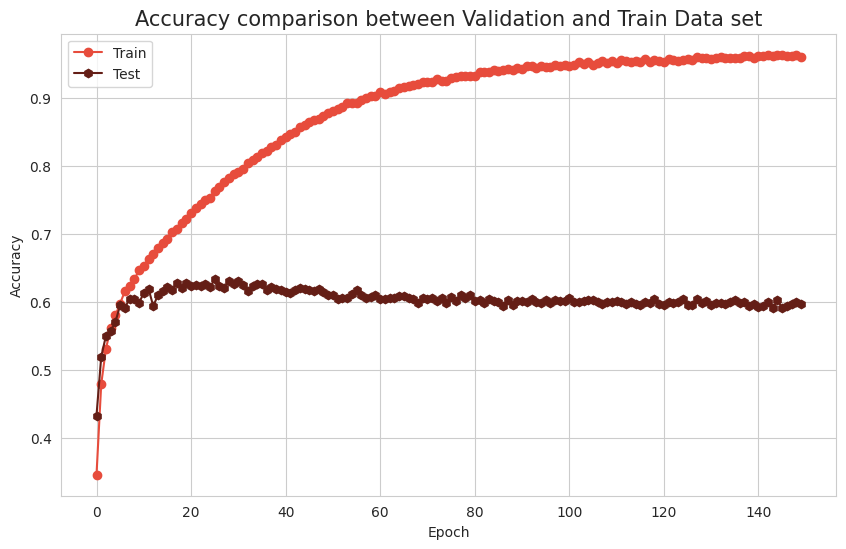

In [54]:
plt.figure(figsize=(10, 6))
sb.set_style("whitegrid")

# Check the keys in the history object
print(m3.history.keys())

# Plot accuracy using the correct key
plt.plot(m3.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(m3.history['val_accuracy'], color='#641E16', marker='h')

plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()


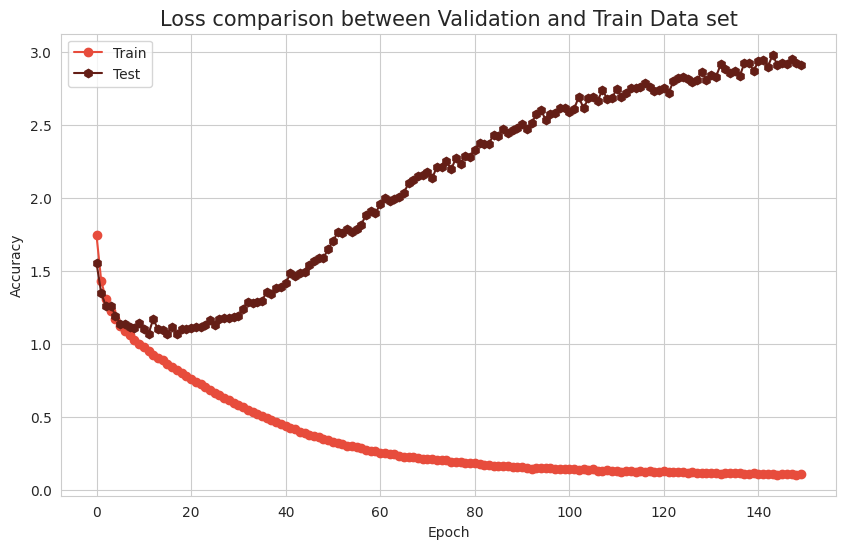

In [ ]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m3.history['loss'],color="#E74C3C",marker='o')
plt.plot(m3.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Case 4: ReLu,softmax,epochs-50,adamax

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adamax

# Assuming x_train.shape[1:] is (width, height, channels) and num_classes is defined

model4 = Sequential()

model4.add(Conv2D(32, (3, 3), kernel_initializer='uniform', input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Conv2D(32, (3, 3), kernel_initializer='uniform'))
model4.add(Activation('relu'))
model4.add(Conv2D(32, (3, 3), kernel_initializer='uniform'))
model4.add(Activation('relu'))

model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(48, (3, 3), kernel_initializer='uniform'))
model4.add(Activation('relu'))
model4.add(Conv2D(48, (3, 3), kernel_initializer='uniform'))
model4.add(Activation('relu'))
model4.add(Conv2D(48, (3, 3), kernel_initializer='uniform'))
model4.add(Activation('relu'))

model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(48, (3, 3), kernel_initializer='uniform'))
model4.add(Activation('relu'))

model4.add(GlobalMaxPooling2D())
model4.add(Dense(500))
model4.add(Dropout(0.25))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

# Summary
model4.summary()

# Compile the model
model4.compile(optimizer=Adamax(),  # Using Adamax optimizer
               loss='categorical_crossentropy',
               metrics=['accuracy'])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_31 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_32 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 activation_33 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)       

In [ ]:
#opt = keras.optimizers.Adam(lr=0.0001)
model4.compile(loss='categorical_crossentropy',
              optimizer="Adamax",
              metrics=['accuracy'])

In [ ]:
 m4=model4.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 18s 9ms/step - loss: 1.9292 - accuracy: 0.2651 - val_loss: 1.7069 - val_accuracy: 0.3710
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6263 - accuracy: 0.4000 - val_loss: 1.4892 - val_accuracy: 0.4529
Epoch 3/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4698 - accuracy: 0.4611 - val_loss: 1.3577 - val_accuracy: 0.5028
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3635 - accuracy: 0.5040 - val_loss: 1.2609 - val_accuracy: 0.5481
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2687 - accuracy: 0.5416 - val_loss: 1.1738 - val_accuracy: 0.5790
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1960 - accuracy: 0.5683 - val_loss: 1.1552 - val_accuracy: 0.5814
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1425 - accuracy: 0.5907 - val_loss: 1.1682 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


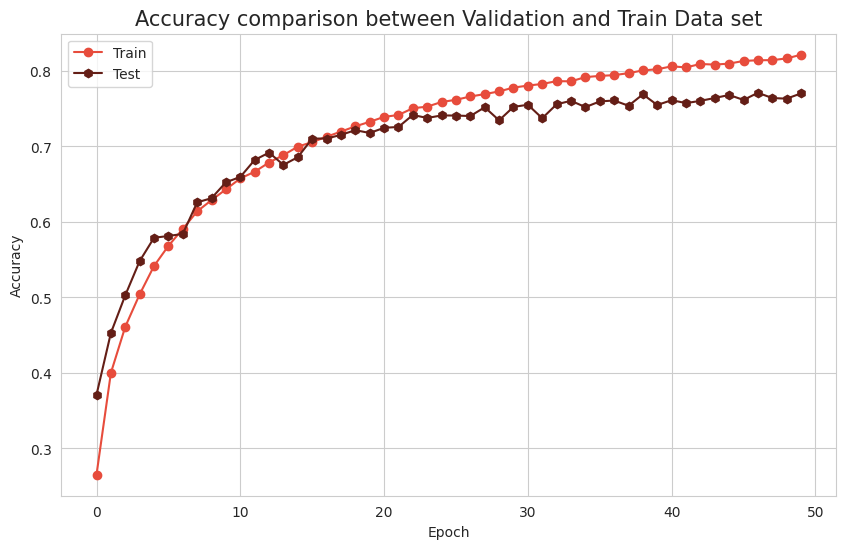

In [53]:
plt.figure(figsize=(10, 6))
sb.set_style("whitegrid")

# Check the keys in the history object
print(m4.history.keys())

# Plot accuracy using the correct key
plt.plot(m4.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(m4.history['val_accuracy'], color='#641E16', marker='h')

plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

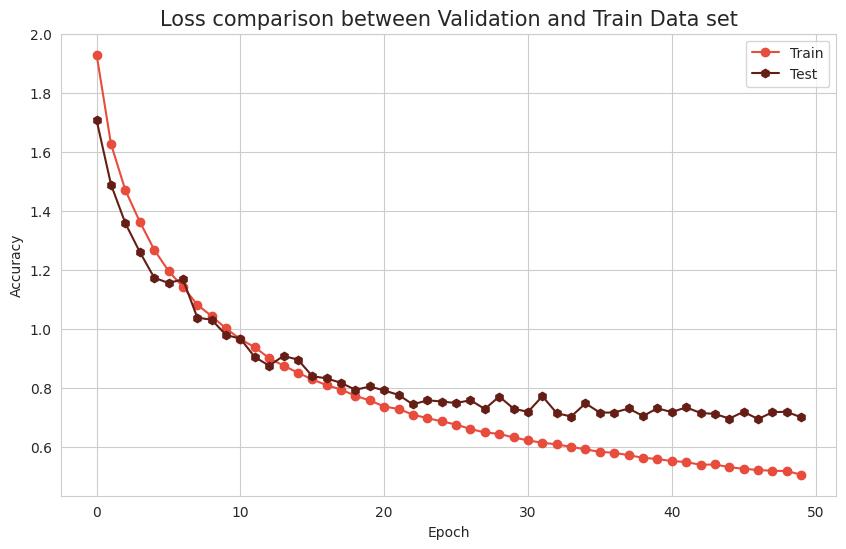

In [50]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m4.history['loss'],color="#E74C3C",marker='o')
plt.plot(m4.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

case 5: ReLu,softmax,epochs-50,adamax

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adamax

# Assuming x_train.shape[1:] is (width, height, channels) and num_classes is defined

model5 = Sequential()

model5.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform', input_shape=x_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model5.add(Activation('relu'))
model5.add(Conv2D(32, (3, 3), kernel_initializer='glorot_uniform'))
model5.add(Activation('relu'))

model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(48, (3, 3), kernel_initializer='glorot_uniform'))
model5.add(Activation('relu'))
model5.add(Conv2D(48, (3, 3), kernel_initializer='glorot_uniform'))
model5.add(Activation('relu'))
model5.add(Conv2D(48, (3, 3), kernel_initializer='glorot_uniform'))
model5.add(Activation('relu'))

model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.25))



model5.add(GlobalMaxPooling2D())
model5.add(Dense(500))
model5.add(Dropout(0.25))
model5.add(Dense(num_classes))
model5.add(Activation('softmax'))

# Summary
model5.summary()

# Compile the model
model5.compile(optimizer=Adamax(),  # Using Adamax optimizer
               loss='categorical_crossentropy',
               metrics=['accuracy'])


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 activation_88 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_85 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_89 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_86 (Conv2D)          (None, 26, 26, 32)        9248      
                                                                 
 activation_90 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 13, 13, 32)      

In [48]:
#opt = keras.optimizers.Adam(lr=0.001)
model5.compile(loss='categorical_crossentropy',
              optimizer="Adamax",
              metrics=['accuracy'])

In [49]:
 m5=model5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=50,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 17s 9ms/step - loss: 1.8171 - accuracy: 0.3092 - val_loss: 1.6724 - val_accuracy: 0.4174
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4670 - accuracy: 0.4584 - val_loss: 1.3665 - val_accuracy: 0.5073
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3004 - accuracy: 0.5292 - val_loss: 1.2941 - val_accuracy: 0.5338
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 1.1938 - accuracy: 0.5730 - val_loss: 1.1546 - val_accuracy: 0.5984
Epoch 5/50
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1105 - accuracy: 0.6052 - val_loss: 1.0865 - val_accuracy: 0.6299
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0513 - accuracy: 0.6259 - val_loss: 1.0062 - val_accuracy: 0.6559
Epoch 7/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9967 - accuracy: 0.6481 - val_loss: 0.9875 - val_

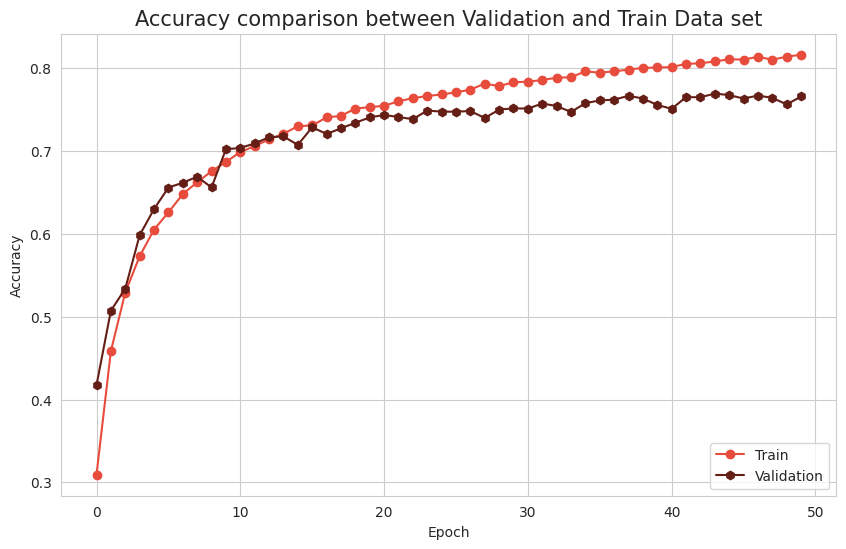

In [51]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(10, 6))
sb.set_style("whitegrid")
plt.plot(m5.history['accuracy'], color="#E74C3C", marker='o', label='Train')
plt.plot(m5.history['val_accuracy'], color='#641E16', marker='h', label='Validation')
plt.title('Accuracy comparison between Validation and Train Data set', fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


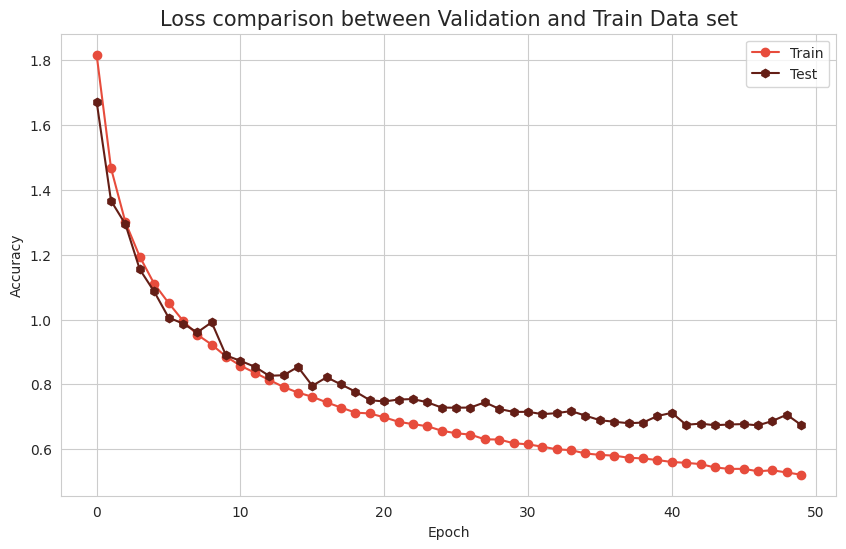

In [52]:
plt.figure(figsize=(10,6))
sb.set_style("whitegrid")
plt.plot(m5.history['loss'],color="#E74C3C",marker='o')
plt.plot(m5.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()